<a href="https://colab.research.google.com/github/mizzony/ML-class/blob/main/assessment_2_%2B_KNN_classifier_Sutinan_230147.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective: here is the code of the assessment plue the irish dataset and Full KNN classification.
The goal is to classify the Iris dataset into its three species (setosa, versicolor, virginica) using a
KNN classifier , Standard scaler to minimize the errors then and optimize its performance using GridSearchCV to find the best parameter.

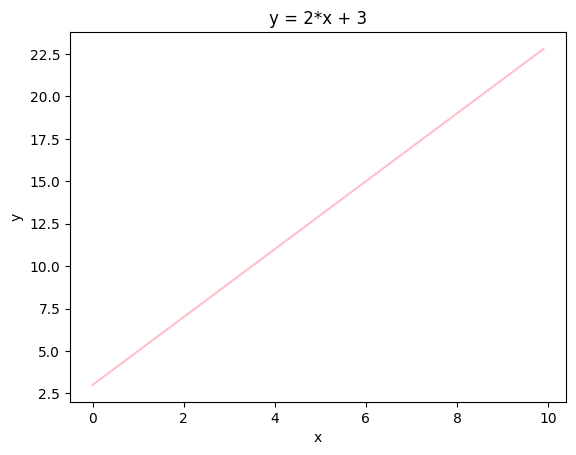

In [41]:
#1 A here is the assesment
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.arange(0, 10, 0.1)  # Smaller interval for smooth curve

# Modify y to have a y-intercept of 2
y = 2*x + 3

plt.title('y = 2*x + 3')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, label='y = 2*x + 3',  color='pink')

# Add grid, legend, and show the plot
#plt.grid()
plt.show()

In [42]:
#1 B Write a program to find the number of and sum of all integers greater than 100 and less than 200 that are divisible by 7
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(100, 200, 7)
print(x)
print(x.sum())

[100 107 114 121 128 135 142 149 156 163 170 177 184 191 198]
2235


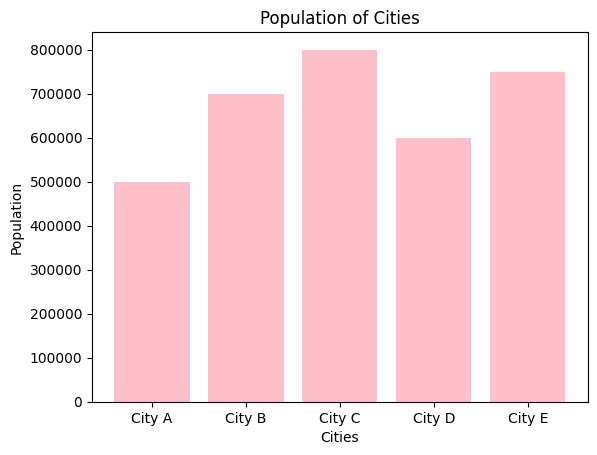

In [43]:
#2 A Write a Python script to create a bar chart showing the population of five cities.
import numpy as np
import matplotlib.pyplot as plt
cities = ['City A', 'City B', 'City C', 'City D', 'City E']
populations = [500000, 700000, 800000, 600000, 750000]
plt.bar(cities, populations, color='pink')
plt.xlabel('Cities')
plt.ylabel('Population')
plt.title('Population of Cities')
plt.show()

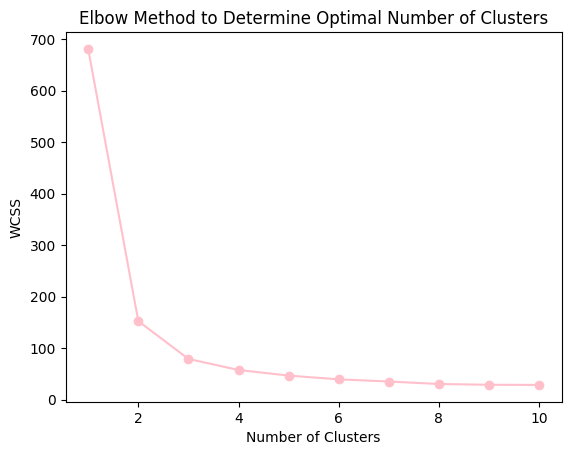

In [39]:
# 2 B elbow methon=d
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

#Calculate WCSS (Within-Cluster Sum of Squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss, marker='o', color='pink')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()


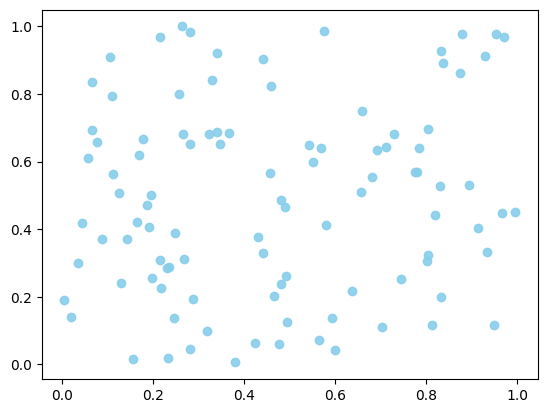

In [44]:
#3 A Write a Python script to create a scatter plot of random data points and customize its appearance by changing the marker style, color, and adding a grid
import numpy as np
import matplotlib.pyplot as plt
x = np.random.rand(100)
y = np.random.rand(100)
plt.scatter(x, y, marker='o', color='skyblue', alpha=0.9)

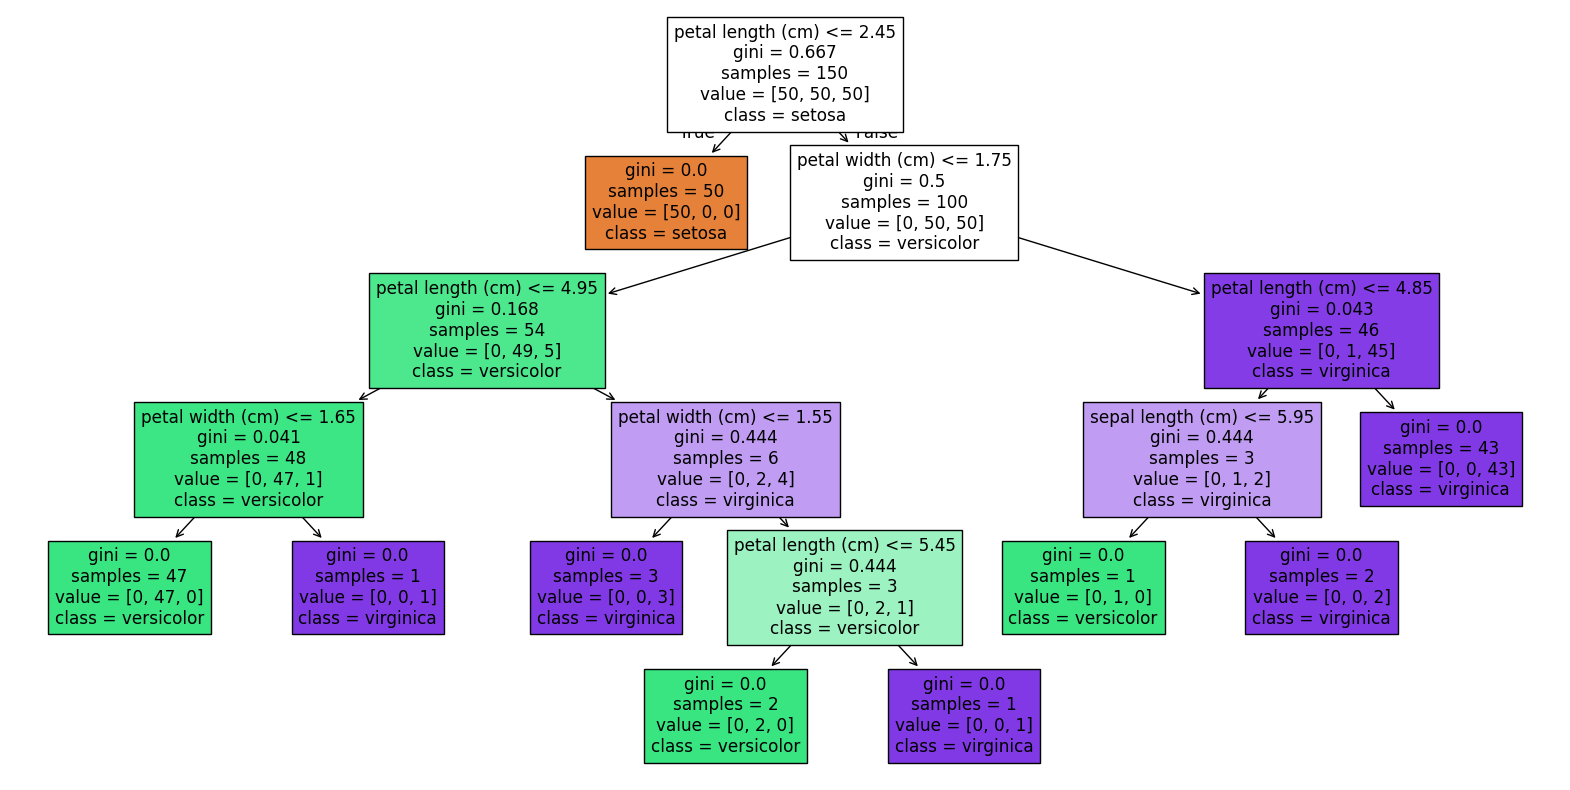

In [40]:
#3 B visualize the tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)  # Corrected the 'random_state' argument
clf.fit(X, y)  # Corrected variable name 'y'

# Visualize the decision tree
plt.figure(figsize=(20,10))  # Corrected to 'figure'
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()  # Corrected to 'show'


# From here will be KNN classifier on irish dataset

In [35]:
# Loading the Iris Data
from sklearn.datasets import load_iris
import pandas as pd # import pandas with alias pd
import numpy as np # import numpy with alias np - this is the convention

df = pd.read_csv('https://raw.githubusercontent.com/mizzony/ML-class/refs/heads/main/iris_dataset')
df.shape

(150, 5)

**Check for missing values because scikit learn requirement**
- Numeric data
- No missing values

In [2]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [3]:
df['species'].head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


no missing values

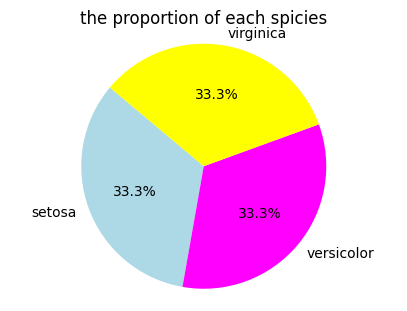

In [4]:
#explore the target value in irish dataset
import matplotlib.pyplot as plt
specie_counts = df['species'].value_counts()

plt.figure(figsize=(5, 3.5))
plt.pie(specie_counts, labels=specie_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'magenta','yellow'])
plt.title('the proportion of each spicies')
plt.axis('equal')
plt.show()

<Axes: >

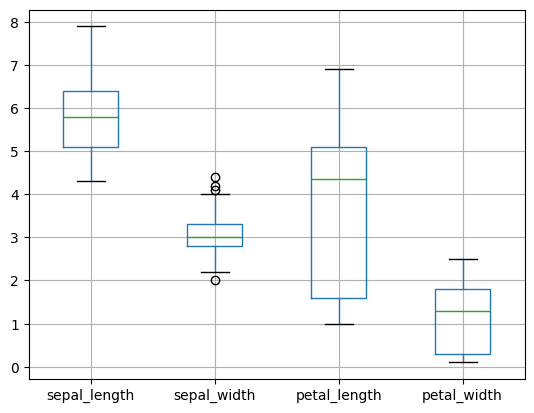

In [5]:
#Explore data of irish set of each X : independent values using box plot of the X values
df.iloc[:,:-1].boxplot()

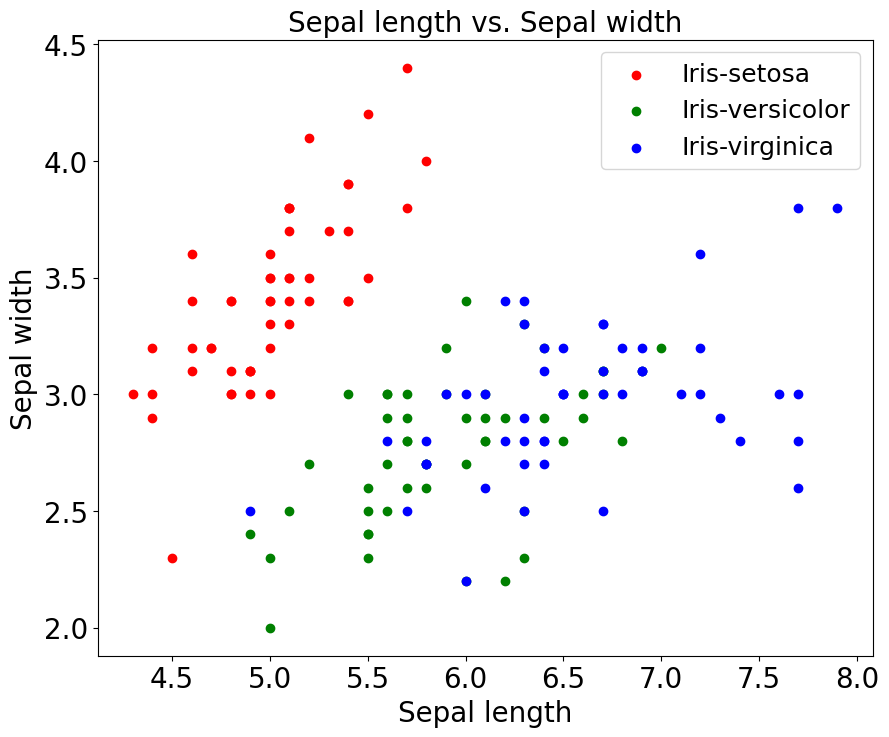

In [6]:
#Analyze Data
import matplotlib.pyplot as plt
plt.figure(4, figsize=(10, 8))

# Use .iloc for integer-location based indexing
plt.scatter(df.iloc[:50, 0], df.iloc[:50, 1], c='r', label='Iris-setosa')

plt.scatter(df.iloc[50:100, 0], df.iloc[50:100, 1], c='g',label='Iris-versicolor')

plt.scatter(df.iloc[100:, 0], df.iloc[100:, 1], c='b',label='Iris-virginica')

plt.xlabel('Sepal length',fontsize=20)
plt.ylabel('Sepal width',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Sepal length vs. Sepal width',fontsize=20)
plt.legend(prop={'size': 18})
plt.show()


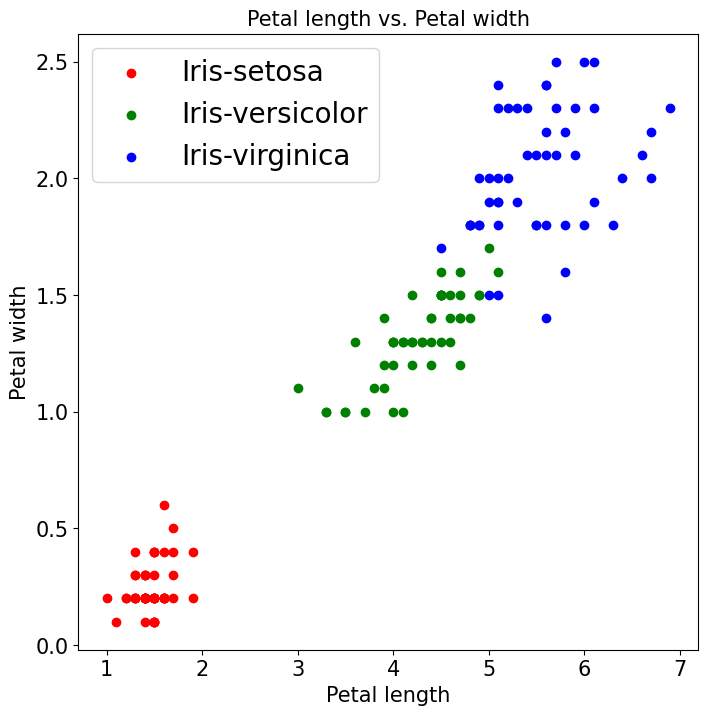

In [7]:
import matplotlib.pyplot as plt

plt.figure(4, figsize=(8, 8))

# Use .iloc for integer-location based indexing with DataFrames
plt.scatter(df.iloc[:50, 2], df.iloc[:50, 3], c='r', label='Iris-setosa')

plt.scatter(df.iloc[50:100, 2], df.iloc[50:100, 3], c='g',label='Iris-versicolor')

plt.scatter(df.iloc[100:, 2], df.iloc[100:, 3], c='b',label='Iris-virginica')

plt.xlabel('Petal length',fontsize=15)
plt.ylabel('Petal width',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Petal length vs. Petal width',fontsize=15)
plt.legend(prop={'size': 20})
plt.show()


In [8]:
#get the correlation between the petal width and length
df.iloc[:,2:4].corr() # Only include numerical columns for correlation calculation

,petal_length,petal_width
petal_length,1.000000,0.962757
petal_width,0.962757,1.000000


a strong correlation of 0.96 for petal-length and petal-width when all three species are combined.

In [9]:
df.iloc[:50,:-1].corr() #setosa #excluse last colume cause we convert it to categorical already

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.746780,0.263874,0.279092
sepal_width,0.746780,1.000000,0.176695,0.279973
petal_length,0.263874,0.176695,1.000000,0.306308
petal_width,0.279092,0.279973,0.306308,1.000000


In [10]:
df.iloc[50:100,:-1].corr() #versicolor

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.525911,0.754049,0.546461
sepal_width,0.525911,1.000000,0.560522,0.663999
petal_length,0.754049,0.560522,1.000000,0.786668
petal_width,0.546461,0.663999,0.786668,1.000000


In [11]:
df.iloc[100:,:-1].corr() #virginica


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.457228,0.864225,0.281108
sepal_width,0.457228,1.000000,0.401045,0.537728
petal_length,0.864225,0.401045,1.000000,0.322108
petal_width,0.281108,0.537728,0.322108,1.000000


<ipython-input-12-ff4ae2216638>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, color = 'pink')


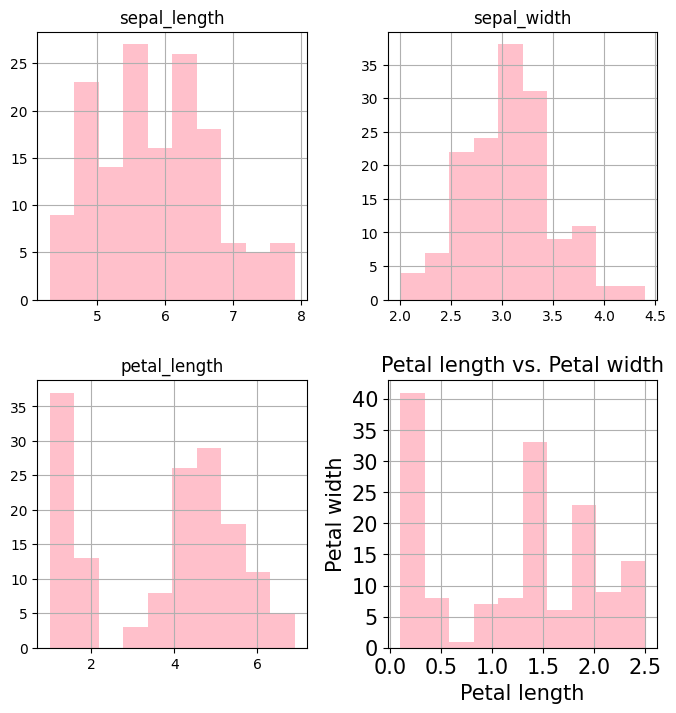

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax=ax, color = 'pink')
plt.xlabel('Petal length',fontsize=15)
plt.ylabel('Petal width',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Petal length vs. Petal width',fontsize=15)
plt.show()

In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Preprocessing the Data**

In [14]:
#split train and test data before train the model
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]  # Features
y = df['species']  # Target variable
#convert y(categorical into numerical) using get dummies

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [15]:
print(X)
#see the features

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [16]:
print(y)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


Standard Scaler because KNN is sensitive to scale of data

In [21]:

from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate again
knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)
print("Accuracy after scaling:", metrics.accuracy_score(y_test, y_pred_scaled))


Accuracy after scaling: 0.9555555555555556


Split data using Tran_test_split fromt Sklearn

In [17]:
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics  # Import metrics for accuracy calculation

# Create KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors' as needed

# Train the KNN Classifier
knn.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9777777777777777


Model Evaluation using confustion Matrix

In [18]:
#Evaluate the Model using confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.95      1.00      0.97        18
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



High precision (close to 1.0) means the model is very specific when predicting a class, with few false positives.  presision of Setosa is very high = 1, followed by versicolor 0.95, overall High F1-scores (close to 1.0) indicate good performance in both precision and recall. Class-specific Results:
Setosa:

Perfect scores for precision, recall, and F1-score (1.00).
This indicates the model identifies all instances of setosa correctly without any false positives or negatives.

Versicolor:
Precision, recall, and F1-score are 0.97, indicating strong performance, though a few errors occurred.

Virginica:
Precision, recall, and F1-score are 0.96, showing slightly weaker performance compared to versicolor.

Cross validation
 Evaluate the model using cross-validation to ensure the accuracy is consistent across different data splits.

In [19]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Scores: [1.         0.95238095 1.         0.85714286 1.        ]
Mean Cross-Validation Accuracy: 0.961904761904762


In [20]:
#Optimize Hyperparameters Use GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 20)}

# Perform Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'n_neighbors': 5}
Best Cross-Validation Accuracy: 0.961904761904762


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [25]:
#Try with 5 neighbors since result after gridsearch show 5 is best parameters
# Train the model with the optimal number of neighbors
best_knn = KNeighborsClassifier(n_neighbors=5)
best_knn.fit(X_train, y_train)

# Evaluate on test data
y_pred_best = best_knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_best)
print("Final Test Accuracy with Best Parameters:", accuracy)


Final Test Accuracy with Best Parameters: 0.9777777777777777


In [26]:
#Compare Train vs. Test Performance

train_accuracy = best_knn.score(X_train, y_train)
test_accuracy = best_knn.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9523809523809523
Testing Accuracy: 0.9777777777777777


# Visualize the KNN classifier
 using Principal Component Analysis (PCA) since there are 4 features we reduce them to 2D for visualization

<ipython-input-34-553f78cdb71a>:53: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca_scaled[:, 0], X_test_pca_scaled[:, 1],


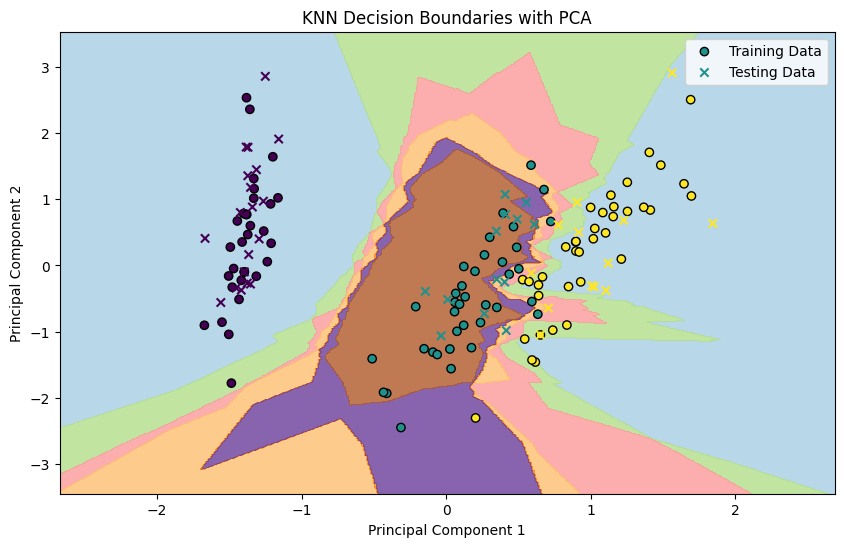

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Assuming X and y are already defined (X contains features and y contains the target labels)
# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # X contains your original feature data

# Split the data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Scale the PCA-transformed features (important for KNN)
scaler = StandardScaler()
X_train_pca_scaled = scaler.fit_transform(X_train_pca)
X_test_pca_scaled = scaler.transform(X_test_pca)

# Train the KNN model with the scaled PCA data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca_scaled, y_train_pca)

# Generate a mesh grid for plotting the decision boundaries
h = 0.01  # Step size in the mesh grid
x_min, x_max = X_train_pca_scaled[:, 0].min() - 1, X_train_pca_scaled[:, 0].max() + 1
y_min, y_max = X_train_pca_scaled[:, 1].min() - 1, X_train_pca_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for each point in the mesh grid
# Change here: Use predict_proba to get probabilities for each class
Z = knn_pca.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Assuming you want to visualize the probability of the second class
# If you have more than 2 classes, you need to choose one to visualize

Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
label_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
y_train_numeric = y_train_pca.map(label_mapping)
y_test_numeric = y_test_pca.map(label_mapping)

# Plot the training data using numerical labels for color
plt.scatter(X_train_pca_scaled[:, 0], X_train_pca_scaled[:, 1],
            c=y_train_numeric, edgecolor='k', marker='o', label='Training Data',
            cmap='viridis') # You can choose a different colormap if you like

# Plot the testing data using numerical labels for color
plt.scatter(X_test_pca_scaled[:, 0], X_test_pca_scaled[:, 1],
            c=y_test_numeric, edgecolor='k', marker='x', label='Testing Data',
            cmap='viridis')  # Use the same colormap for consistency

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundaries with PCA')
plt.legend()
plt.show()

**Result after visualization using PCA**
Decision Boundaries:

The plot shows decision regions that have been created by the KNN algorithm. Each color represents a different class in the dataset, and the smooth transitions between regions indicate how KNN classifies points based on their distance from the nearest neighbors.

The circles (●) represent the training data points, and they appear well-distributed across the decision regions. Since the KNN algorithm is a non-parametric method, it learns the decision boundaries from the training data, and this visualization shows how well it has fit the training set.

Model Performance: The testing points appear well-separated in the plot, suggesting that the KNN model has generalized well to unseen data. This aligns with the high testing accuracy (97.78%)


# Conclusion


The KNN model, after preprocessing, hyperparameter optimization, and scaling, has demonstrated strong performance with high accuracy on both the training and test data. It is a good fit for the dataset and should be ready for further evaluation or deployment.

The high testing accuracy indicates that the model has successfully captured the underlying patterns in the data.
The optimized model (with n_neighbors=5) shows that fine-tuning the hyperparameters through grid search helped the model achieve its best performance